# [POLSCI-5] Immigration

Estimated Time: 30-40 minutes <br>
Created by: Lauren Hom, Ravi Singhal 

Today we will be examining three data sets on immigration to the United States, where these datasets were created from data collected by the United States Department of Homeland Security... **TO DO**  

### Table of Contents 
0 - [Jupyter Introduction ](#0) <br>
1 - [The Dataset](#1)<br>
2 - [Table 1: Persons Obtaining Lawful Permanent Resident Status](#2)<br>
3 - [Table 2: Immigration by Class of Admission](#3)<br>
4 - [Table 3: Immigration by Last Permanent Residence](#4)<br>
5 - [Discussion](#5)<br>
6 - [Bibliography](#6)

# Jupyter Introduction <a id='0'></a>

This webpage is a Jupyter Notebook. **Notebooks** are documents that can contain text, code, visualizations, and more. 

A notebook is composed of rectangular sections called **cells**. There are 2 kinds of cells: markdown and code. A **markdown cell**, such as this one, contains text. A **code cell** contains code in Python, a programming language that we will be using for the remainder of this module. You can select any cell by clicking it once. After a cell is selected, you can navigate the notebook using the up and down arrow keys.

To run a code cell once it's been selected, 
- press `Shift + Enter`, or
- click the `▶| Run` button in the toolbar at the top of the screen. 

If a code cell is running, you will see an asterisk (\*) appear in the square brackets to the left of the cell. Once the cell has finished running, a number will replace the asterisk and any output from the code will appear under the cell. 

An example of a code cell is below. Try running it. If everything works properly, the word "Success" should be printed under the cell.

In [1]:
# This cell sets up the notebook. Just run this cell.
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

print("Success!")

Success!


You'll notice that many code cells contain lines of blue text that start with a `#`. These are *comments*. Comments often contain helpful information about what the code does or what you are supposed to do in the cell. The leading `#` tells the computer to ignore them.

# The Dataset <a id='1'></a>

The three tables (datasets) contain information about immigration to the United States. Here is a description of the data as stated on the United States Department of Homeland Security:

> "The 2017 Yearbook of Immigration Statistics is a compendium of tables that provide data on foreign nationals who are granted lawful permanent residence (i.e., immigrants who receive a “green card”), admitted as temporary nonimmigrants, granted asylum or refugee status, or are naturalized. The Yearbook also presents data on immigration enforcement actions, including apprehensions and arrests, removals, and returns"

The three datasets we will be looking at contain data on:
- Foreign nationals granted lawful permanent residence (i.e., immigrants who receive a “green card”) 
- Immigration enforcement actions 

<br>If you want to read more about the dataset, click [here](https://www.dhs.gov/immigration-statistics/yearbook/2017).


# Table 1: Persons Obtaining Lawful Permanent Resident (LPR) Status <a id='2'></a>

The first table we will explore contains data on the number of immigrants who obtained lawful permanent residence or received a "green card" to the U.S. on a temporary basis between 1989-2017 for a given country. 

Here are the first 5 rows of the table. There are 5925 rows and 3 columns.

In [2]:
region_country = Table.read_table('ImmigrantsRegionCountry.csv') # read in the dataset
region_country.show(5)

fiscal_year,country,total
1989,Afghanistan,3232
1989,Albania,71
1989,Algeria,230
1989,American Samoa,1
1989,Andorra,4


### Column

First, let's examine what a *column* is. There are a total of 3 columns in this table:
- `fiscal_year` - years range from 1989-2017 **CLARIFY FISCAL YEAR AND HOW DEFINED IN THIS CASE?**
- `country` - country where immigrants came from
- `total` - the total number of immigrants for a given fiscal year

Here are some of the countries and regions in the table. There are a total of 240 countries and regions represented in the table.

In [3]:
#Run this cell to display the first 15 countries and regions in the table
countries_regions = region_country.group('country').show(15)
countries_regions

country,count
Afghanistan,29
Albania,29
Algeria,29
American Samoa,19
Andorra,8
Angola,29
Anguilla,29
Antigua-Barbuda,29
Argentina,29
Armenia,26


### Row

Second, let's examine what a *row* is. Each row in the table gives the total number of immigrants admitted during the specific fiscal year for a given country.

For example, here is the first row of the dataset. This row shows that there were 3232 immigrants who were granted lawful permanent residence from Afghanistan in 1989.

In [4]:
region_country.take(0)

fiscal_year,country,total
1989,Afghanistan,3232


Let's look at the data more closely for a specific country.

## Mexico: Persons Obtaining Lawful Permanent Resident Status

We will specifically look at data for Mexico, paying particular attention to the total before and after 2008. 

### Subset of the Data

First, let's filter the overall table so that we only have a subset of the data-- data on only Mexico. The **`where`** function allows us to choose certain rows based on two arguments:
- A column label
- A condition that each row should match, called the _predicate_ 

In other words, we call the `where` function like so: `table_name.where(column_name, predicate)`. 

In [5]:
#Shows only the data for the country Mexico 
mexico = region_country.where('country', 'Mexico')
mexico.show(29)

fiscal_year,country,total
1989,Mexico,405172
1990,Mexico,679068
1991,Mexico,946167
1992,Mexico,213802
1993,Mexico,126561
1994,Mexico,111398
1995,Mexico,89932
1996,Mexico,163572
1997,Mexico,146865
1998,Mexico,131575


### Visualize the Data 

Here is a line plot of the number of immigrants who were granted lawful permanent residence from 1989-2017. 

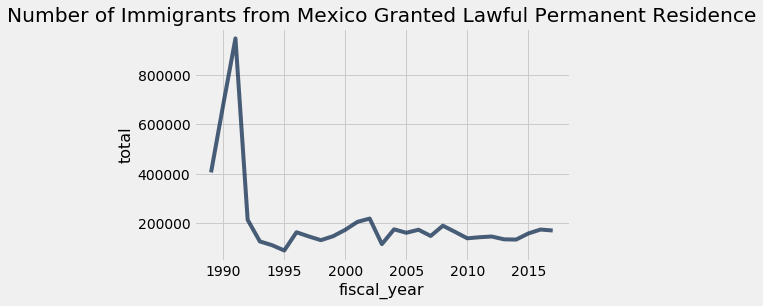

In [6]:
mexico.plot('fiscal_year', 'total') #generates the line plot with fiscal_year on the x-axis and total on the y-axis
plt.title('Number of Immigrants from Mexico Granted Lawful Permanent Residence') #titles the plot
plt.show()

Here is the same plot, but zoomed in so we see the years after 1995 more clearly.
**Maybe delete this plot?**

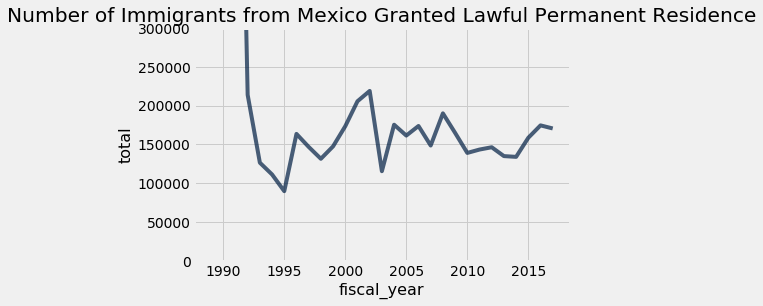

In [7]:
mexico.plot('fiscal_year', 'total') #generates the line plot with fiscal_year on the x-axis and total on the y-axis
plt.title('Number of Immigrants from Mexico Granted Lawful Permanent Residence') #titles the plot
plt.ylim(0, 300000) #Shows the plot from y = 0 to 300000
plt.show()


Let's take a look at the highest and lowest points that appear in the graph. 

The `column` function takes all of the values in the specified column in the form of a list. The `min` function takes many integers (e.g. a list of integers) and returns the smallest. Likewise, the `max` function takes many integers and returns the largest.

In [8]:
#Row with the MINIMUM total 
lowest_total = min(mexico.column('total'))#Takes all of the values from the 'total' column and finds the minimum value
print('Lowest total granted lawful permanent residence:', lowest_total) #prints the lowest total
mexico.where('total', lowest_total) #Finds the row with the lowest total 

Lowest total granted lawful permanent residence: 89932


fiscal_year,country,total
1995,Mexico,89932


In [9]:
#Row with the maximum total immigration in Mexico
highest_total = max(mexico.column('total'))#Takes all of the values from the 'total' column and finds the maximum value
print('Highest total granted lawful permanent residence:', highest_total) #prints the highest total
mexico.where('total', highest_total) #Finds the row with the highest total 

Highest total granted lawful permanent residence: 946167


fiscal_year,country,total
1991,Mexico,946167


### Discussion 1

With a partner, briefly discuss the following question:

What happened in Mexico in 1995 and 1991? How might this explain why the total number of immigrants granted lawful permanent status was at its lowest and higest?

# Table 2: Immigration by Class of Admission <a id='3'></a>

The second table we will explore provides information on the type of admission (class) immigrants granted lawful permanent residence received. The Department of Homeland Security describes the Immigrant Classes of Admissions, below:

> "A lawful permanent resident (LPR) or “green card” recipient may live and work anywhere in the United States and may apply to become U.S. citizens if they meet certain eligibility and admissibility requirements. The Immigration and Nationality Act (INA) provides several broad classes of admission for foreign nationals to gain LPR status, the largest of which focuses on admitting immigrants for the purpose of family reunification. Other major categories include economic and humanitarian immigrants, as well as immigrants from countries with relatively low levels of immigration to the United States." ([U.S. Department of Homeland Security](https://www.dhs.gov/immigration-statistics/lawful-permanent-residents/ImmigrantCOA))

Here are the first 5 rows of the table. There are 20907 columns and 4 rows.

In [10]:
class_perm = Table.read_table('immigrants-class-perm.csv') # read in the dataset
class_perm.show(5)

country,type,fiscal_year,total
Afghanistan,Cancellation of Removal,1999,6
Afghanistan,Cancellation of Removal,2000,7
Afghanistan,Cancellation of Removal,2001,3
Afghanistan,Cancellation of Removal,2002,1
Afghanistan,Cancellation of Removal,2004,5


### Column

Again, let's briefly examine the *columns* in this dataset. Like the first table, we see the following columns:
- `fiscal_year` - years range from 1989-2017 **CLARIFY FISCAL YEAR AND HOW DEFINED IN THIS CASE?**
- `country` - country where immigrants came from
- `total` - the total number of immigrants for a given fiscal year

There is an additional column in this table: `type`. The `type` refers to the class immigrants were admitted with to be granted lawful permanent residence. There are a total of 9 types or classes in the table.

In [11]:
#Run this cell to display all of the "types" of classes in the table, sorted by the type with the most occurences 
types = class_perm.group('type').sort('count', descending = True) 
types

type,count
Immediate relatives of U.S. citizens,4046
Employment-based preferences,3594
Family-sponsored preferences,3418
Diversity,3179
Refugees and asylees,3115
Other,2673
Cancellation of Removal,658
IRCA legalization,131
Suspension of Deportation,93


### Discussion 2

With a partner, choose two a type that you are unsure about. Each partner should look up one of the types [here](https://www.dhs.gov/immigration-statistics/lawful-permanent-residents/ImmigrantCOA). Then briefly discuss what the types mean.

**Cancellation of removal, IRCA legalization, and Suspension of Deportation not in the link? May need to just state for them instead of having them do a discussion**

### Row

Finally, each *row* in the table gives the total number of immigrants admitted under the stated class for a given country in a particular year. 

For example, here is the first row of the dataset. This row shows that there were 6 immigrants who were granted lawful permanent residence from Afghanistan in 1999 for the "Cancelation of Removal" class. 

In [12]:
class_perm.take(0) #takes the first row of the table

country,type,fiscal_year,total
Afghanistan,Cancellation of Removal,1999,6


Let's take a look at the data for Mexico again with this Class of Admission table.

## Mexico: Class by Admission

Once again, we will take a subset of the data from the overall Class by Admission table. To do this, we will use the `where` function again.

Run the cell below to see the subset of data of Mexico. The subset of data for Mexico shows data from 1997-2017.

In [13]:
#Shows only data for the Class Admission of Mexico
mexico_class = class_perm.where('country', 'Mexico')
mexico_class

country,type,fiscal_year,total
Mexico,Cancellation of Removal,1998,103
Mexico,Cancellation of Removal,1999,4119
Mexico,Cancellation of Removal,2000,2321
Mexico,Cancellation of Removal,2001,2126
Mexico,Cancellation of Removal,2002,1908
Mexico,Cancellation of Removal,2003,2461
Mexico,Cancellation of Removal,2004,3243
Mexico,Diversity,1997,27
Mexico,Diversity,1998,14
Mexico,Diversity,1999,9


Run the cell below to see which type has the highest total of immigrants across the years 1997-2017.

In [14]:
#Shows the total number of immigrants admitted under each group across the years in the table
#First groups the types from Mexico, summing all of the remaining columns
#Drops the columns that cannot be summed, like country and fiscal_year
#Sorts the types by total sum
mexico_class.group('type', sum).drop(1,2).sort('total sum', descending = True)

type,total sum
Immediate relatives of U.S. citizens,1953970
Family-sponsored preferences,1120030
Employment-based preferences,149303
Other,85260
Cancellation of Removal,16281
Refugees and asylees,9472
IRCA legalization,3990
Suspension of Deportation,1169
Diversity,327


### Visualize the Data

Let's plot the total number of immigrants for the top three types: Immediate relatives of U.S. citizens, Family-sponsored references, and Employment-based preferences. To do this we will use the `where` function in order to get a subset of the data on Mexico for only one particular type.

Run the cell below to extract the three subsets of data. The subset of data for Employment-based preferences should display for you.

In [15]:
immediate = mexico_class.where('type', 'Immediate relatives of U.S. citizens') #all of the data on Mexico with the given type
family = mexico_class.where('type', 'Family-sponsored preferences') #all of the data on Mexico with the given type
employment = mexico_class.where('type', 'Employment-based preferences') #all of the data on Mexico with the given type
employment #displays the data on Mexico for the years where the type was employment-based preferences

country,type,fiscal_year,total
Mexico,Employment-based preferences,1997,3548
Mexico,Employment-based preferences,1998,3622
Mexico,Employment-based preferences,1999,2563
Mexico,Employment-based preferences,2000,3820
Mexico,Employment-based preferences,2001,7234
Mexico,Employment-based preferences,2002,7047
Mexico,Employment-based preferences,2003,3151
Mexico,Employment-based preferences,2004,7061
Mexico,Employment-based preferences,2005,15597
Mexico,Employment-based preferences,2006,8853


Next we will combine the three subsets of data, so that we can visualize all three classes on the same plot. 

To do this we will first use the `join` function. 

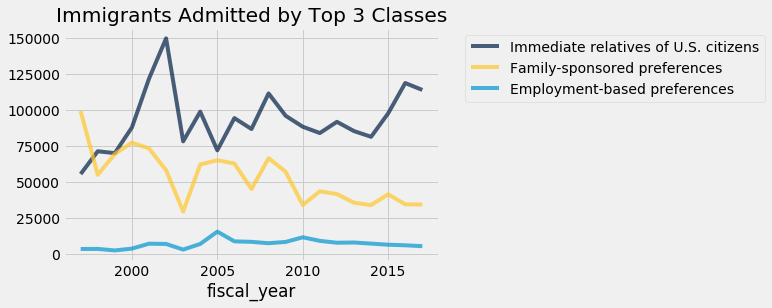

In [16]:
grouped = immediate.join('fiscal_year', family).join('fiscal_year', employment)
grouped = grouped.drop('country', 'country_2', 'country_3', 'country_4', 'type', 'type_2', 'type_3')
grouped.relabel('total', 'Immediate relatives of U.S. citizens').relabel('total_2', 'Family-sponsored preferences').relabel('total_3', 'Employment-based preferences')
grouped.plot('fiscal_year')
plt.title('Immigrants Admitted by Top 3 Classes')
plt.show()

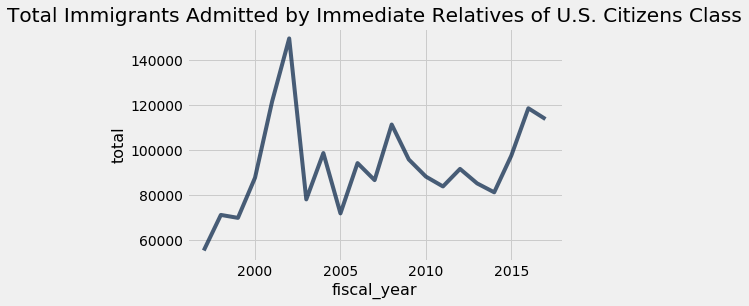

In [17]:
immediate.plot('fiscal_year', 'total') #generates the line plot with fiscal_year on the x-axis and total on the y-axis
plt.title('Total Immigrants Admitted by Immediate Relatives of U.S. Citizens Class') #titles the plot
plt.show()

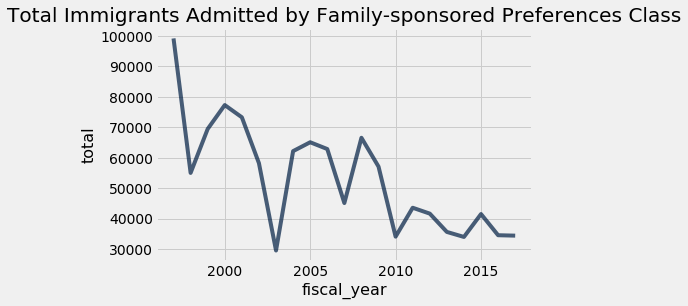

In [18]:
family.plot('fiscal_year', 'total') #generates the line plot with fiscal_year on the x-axis and total on the y-axis
plt.title('Total Immigrants Admitted by Family-sponsored Preferences Class') #titles the plot
plt.show()

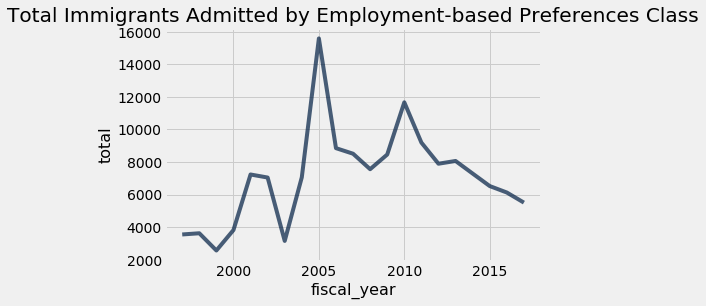

In [19]:
employment.plot('fiscal_year', 'total')#generates the line plot with fiscal_year on the x-axis and total on the y-axis
plt.title('Total Immigrants Admitted by Employment-based Preferences Class') #titles the plot
plt.show()

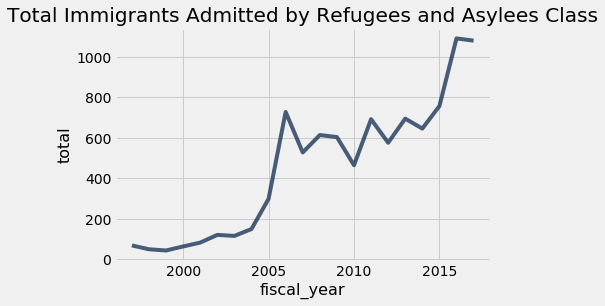

In [20]:
refugees = mexico_class.where('type', 'Refugees and asylees')
refugees.plot('fiscal_year', 'total') #generates the line plot with fiscal_year on the x-axis and total on the y-axis
plt.title('Total Immigrants Admitted by Refugees and Asylees Class') #titles the plot
plt.show()

In [21]:
grouped

fiscal_year,Immediate relatives of U.S. citizens,Family-sponsored preferences,Employment-based preferences
1997,55544,99174,3548
1998,71320,55001,3622
1999,70015,69442,2563
2000,87826,77289,3820
2001,121627,73272,7234
2002,149596,58202,7047
2003,78200,29526,3151
2004,98765,62158,7061
2005,71987,65074,15597
2006,94313,62847,8853


### Discussion 3